Task 3: Customer Segmentation / Clustering

Step 1: Data Preparation

In [7]:
import pandas as pd

# Load the customer transactions data
customer_transactions = pd.read_csv('Transactions.csv')  # Replace with the correct file path

# Print column names to verify
print("Columns in the dataset:", customer_transactions.columns)

# Inspect the first few rows to check the data
print(customer_transactions.head())

# Check if the 'TotalValue' and 'Quantity' columns exist
if 'TotalValue' in customer_transactions.columns and 'Quantity' in customer_transactions.columns:
    # Prepare clustering data by selecting only the necessary columns
    clustering_data = customer_transactions[['TotalValue', 'Quantity']]
    
    # Handle missing values, filling them with 0 (or another strategy as needed)
    clustering_data = clustering_data.fillna(0)

    # Apply K-Means clustering
    from sklearn.cluster import KMeans

    kmeans = KMeans(n_clusters=5, random_state=42)
    customer_transactions['Cluster'] = kmeans.fit_predict(clustering_data)

    # Evaluate clustering with Davies-Bouldin index
    from sklearn.metrics import davies_bouldin_score
    db_index = davies_bouldin_score(clustering_data, customer_transactions['Cluster'])
    print(f'Davies-Bouldin Index: {db_index}')
else:
    print("The 'TotalValue' or 'Quantity' columns are not found in the data.")


Columns in the dataset: Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  
Davies-Bouldin Index: 0.488338772202037


Step 2: Visualization

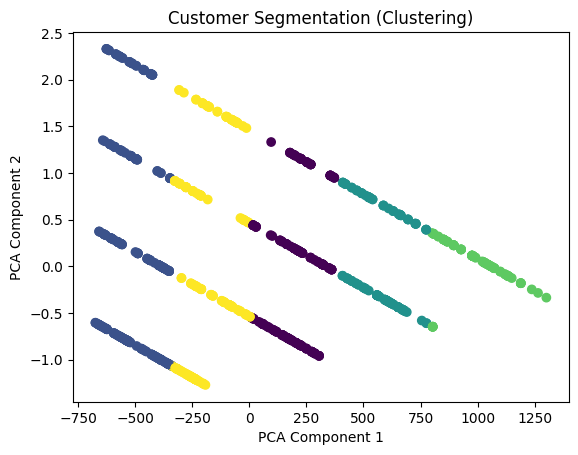

In [9]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(clustering_data)

# Scatter plot for customer segmentation
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=customer_transactions['Cluster'], cmap='viridis')
plt.title('Customer Segmentation (Clustering)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
